# **1. Perkenalan Dataset**


### Tentang Dataset
Dataset ini didapatkan dari Website Kaggle yang mencakup berbagai fitur yang berhubungan dengan cuaca dan mengkategorikan cuaca ke dalam empat jenis: Hujan, Cerah, Berawan, dan Bersalju. Tujuaannya untuk mengklasifikasikan jenis cuaca.

### Fitur Dataset
- Temperature (numeric): suhu udara yang diukur pada lokasi dan waktu tertentu dalam satuan derajat Celcius.
- Humidity (numeric): perbandingan antara jumlah uap air yang ada di udara dengan jumlah maksimum uap air yang dapat ditahan oleh udara pada suhu tersebut, dinyatakan dalam persen (%).
- Wind Speed (numeric): ukuran seberapa cepat udara bergerak secara horizontal, dalam kilometer per jam.
- Precipitation (%) (numeric): segala bentuk curah hujan (hujan, salju, hujan es) yang jatuh ke permukaan bumi.
- Cloud Cover (categorical): Tingkat tutupan awan di langit, biasanya diklasifikasikan sebagai “Clear”, “Partly Cloudy”, “Mostly Cloudy”, atau “Overcast”.
- Atmospheric Pressure (numeric): gaya yang diberikan oleh berat udara di atmosfer terhadap permukaan bumi, diukur dalam hektopascal (hPa).
- UV Index (numeric): Indeks yang mengukur intensitas sinar ultraviolet (UV) dari matahari di permukaan bumi.
- Season (categorical): Musim saat data dikumpulkan: “Spring”, “Summer”, “Autumn”, atau “Winter”.
- Visibility (km) (numeric):  Jarak pandang horizontal maksimum di mana objek dapat dilihat dan dikenali dengan jelas, dalam kilometer.
- Location (categorical): Tipe lokasi tempat pengambilan data cuaca, seperti “Urban”, “Rural”, “Coastal”, “Mountainous”, dll.
- Weather Type (categorical): Kondisi cuaca utama yang diamati, seperti “Sunny”, “Rainy”, “Cloudy”, “Snowy”, “Stormy”, dll.

### Sumber Dataset
[Weather Type Clasfification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data)



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
!gdown 1gntpndTGIBwhSwPH583Jd2hsCGsRH7wx

Downloading...
From: https://drive.google.com/uc?id=1gntpndTGIBwhSwPH583Jd2hsCGsRH7wx
To: /content/weather_classification_data.csv
100% 826k/826k [00:00<00:00, 21.0MB/s]


In [3]:
df = pd.read_csv('weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
print("Ukuran dataset:", df.shape)

Ukuran dataset: (13200, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
print("Jumlah missing value pada dataset:")
df.isnull().sum()

Jumlah missing value pada dataset:


,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [7]:
print("Jumlah data duplikat pada dataset:", df.duplicated().sum())

Jumlah data duplikat pada dataset: 0


In [8]:
print("Statistik deskriptif dari dataset:")
df.describe()

Statistik deskriptif dari dataset:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


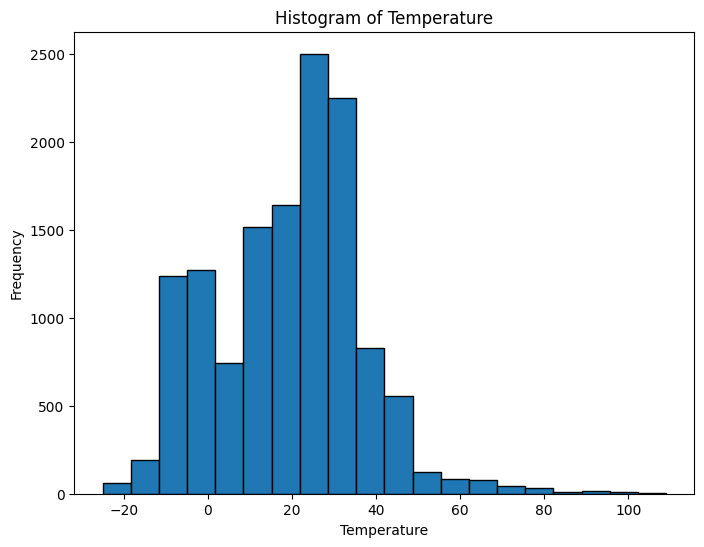

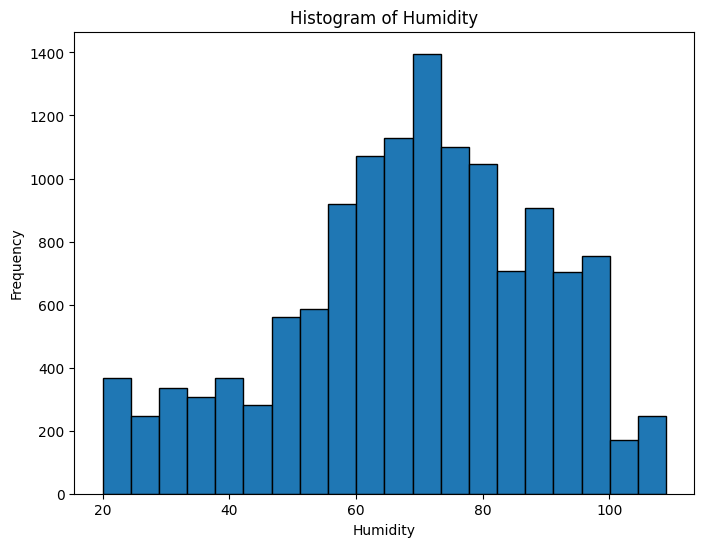

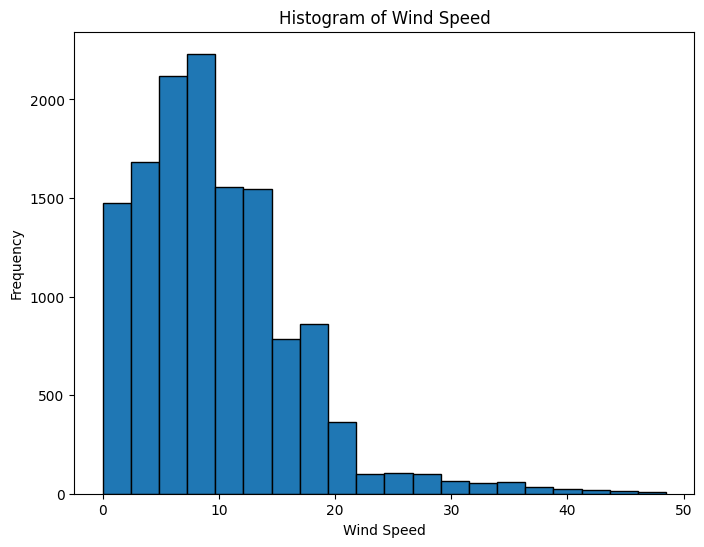

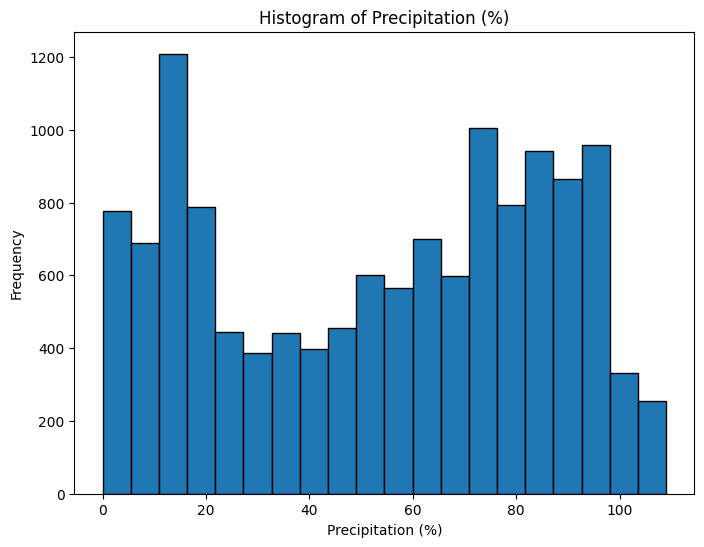

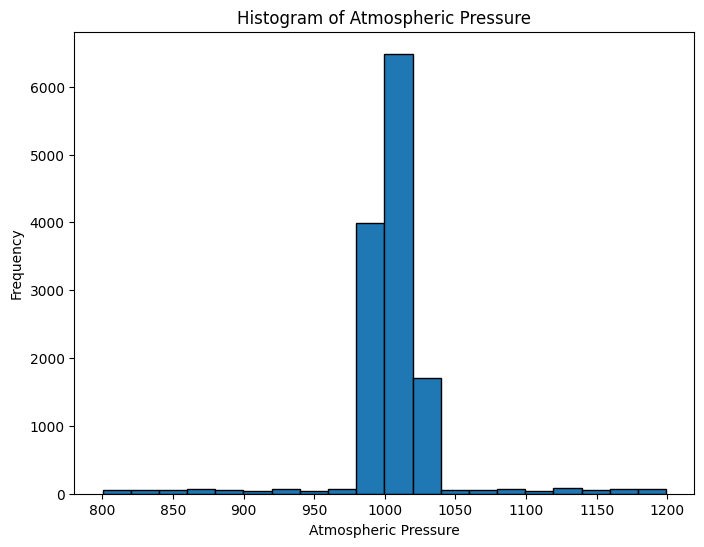

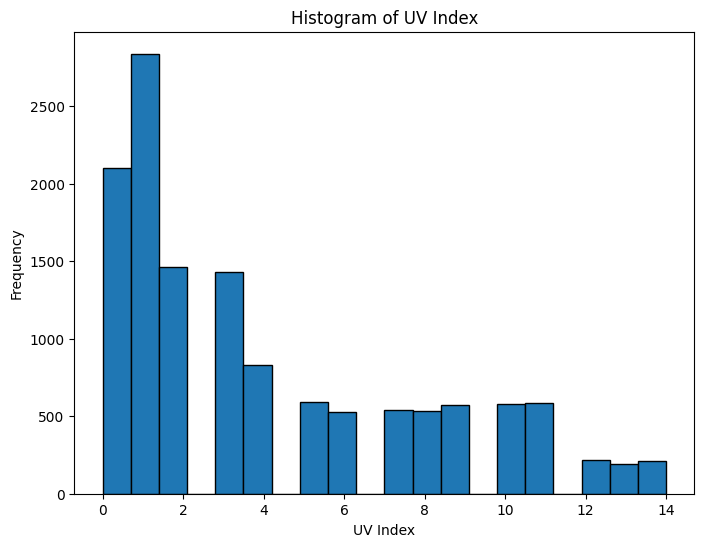

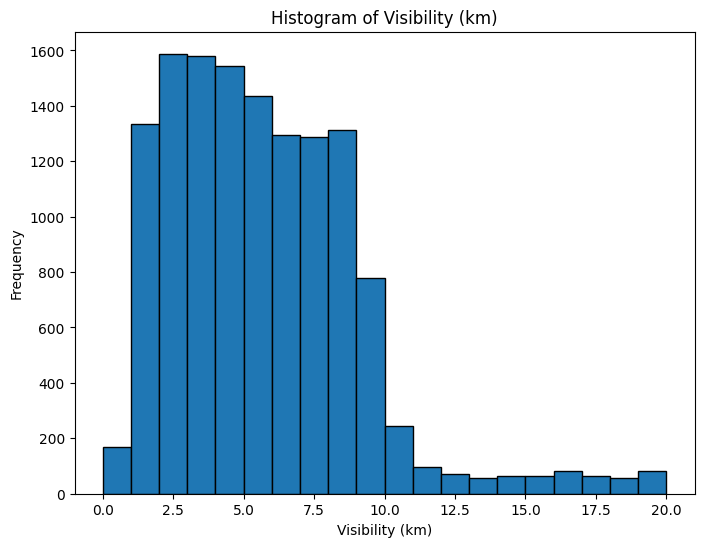

In [9]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

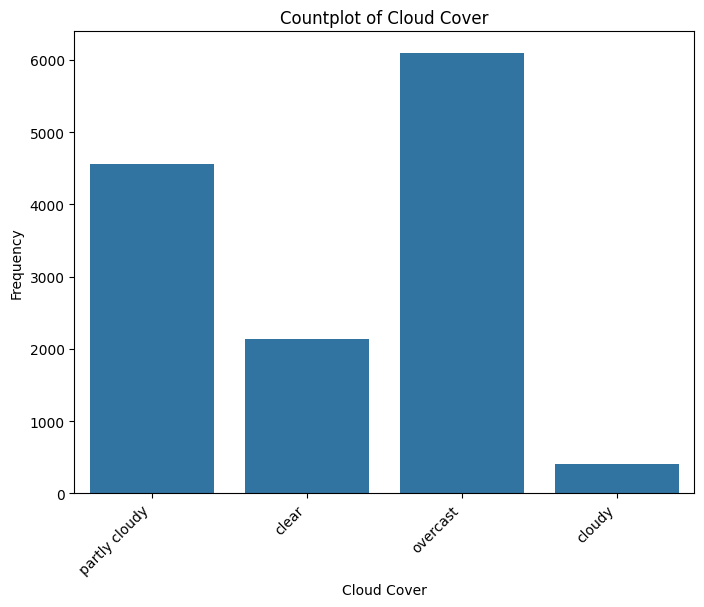

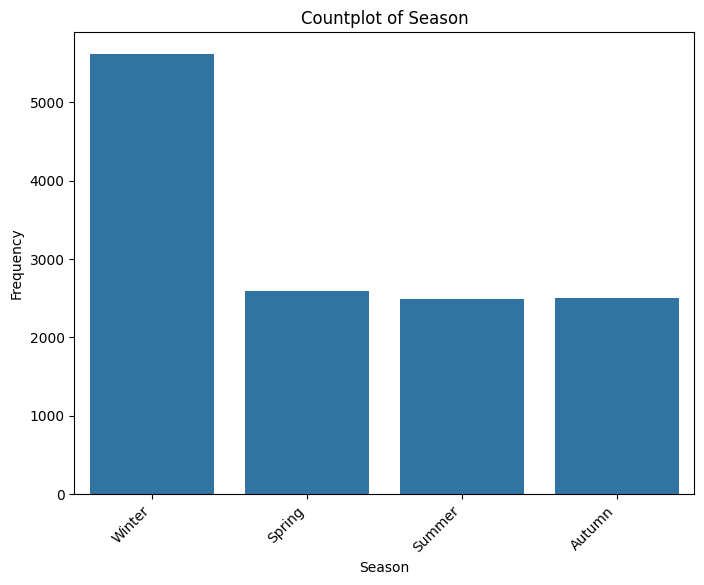

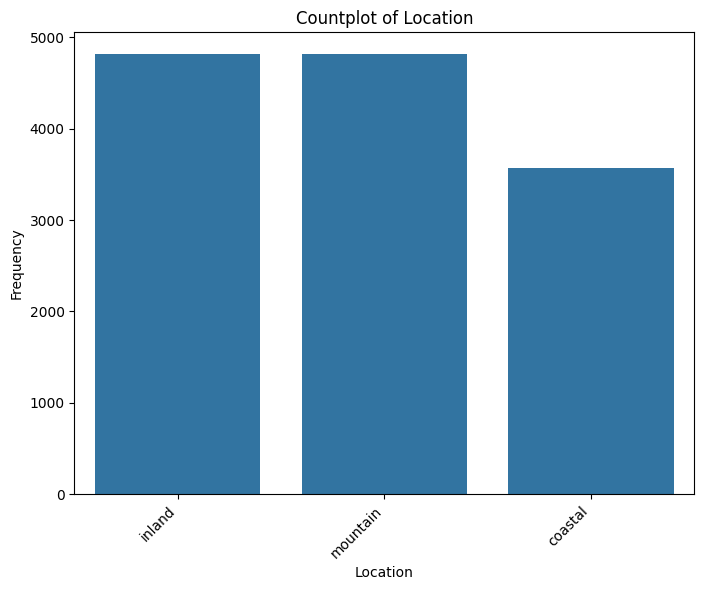

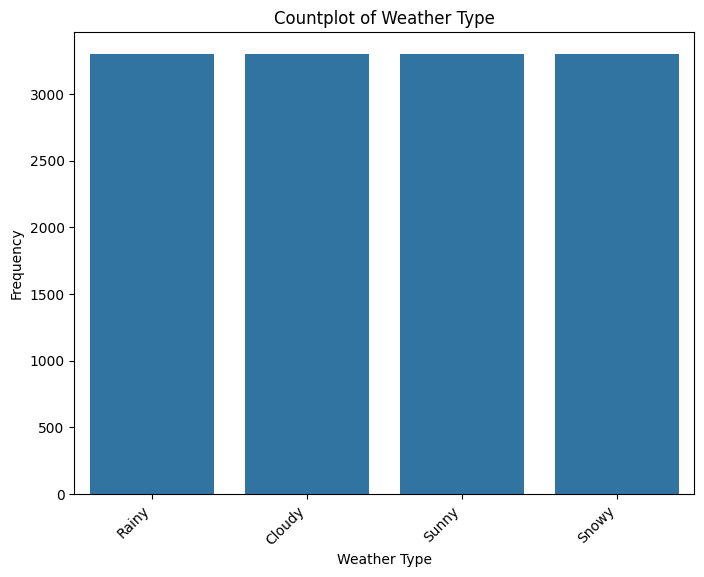

In [10]:
categorical_features = df.select_dtypes(include=['object']).columns

for column in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

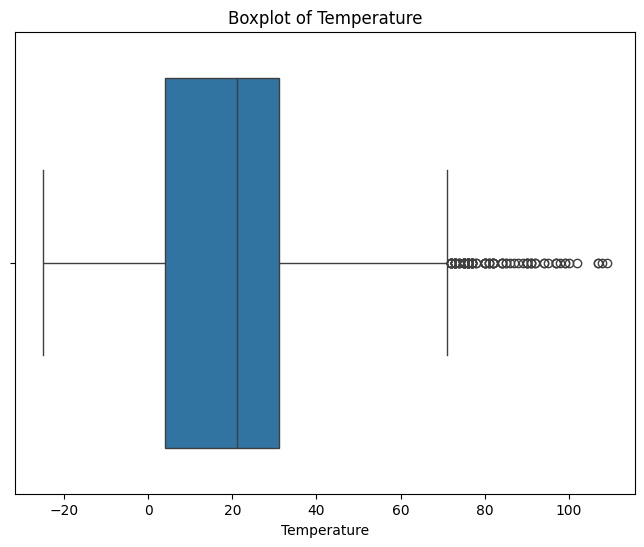

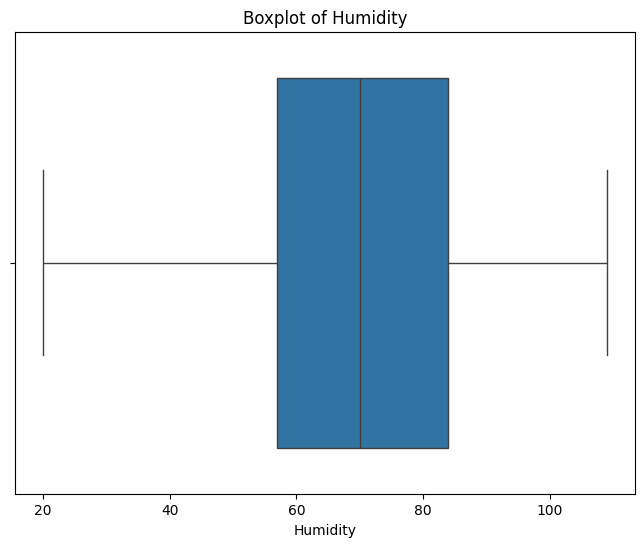

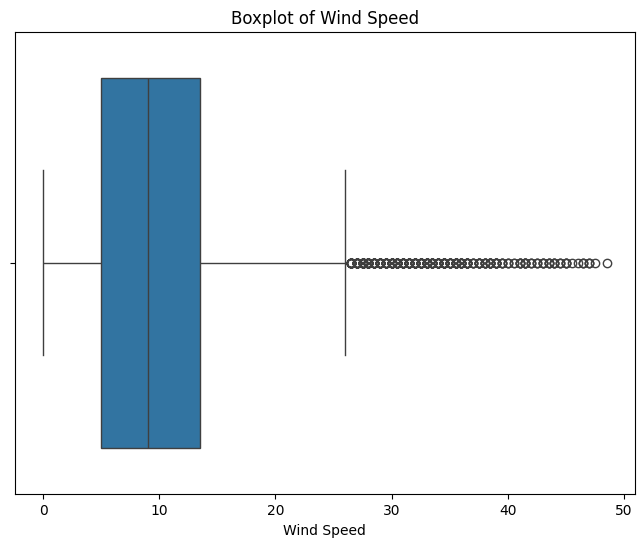

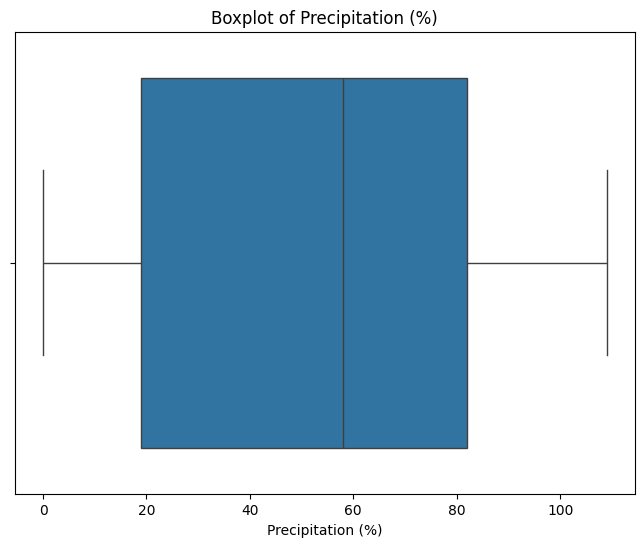

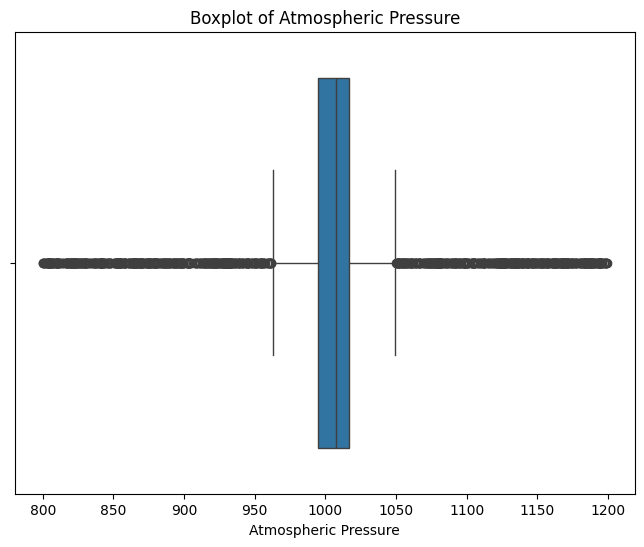

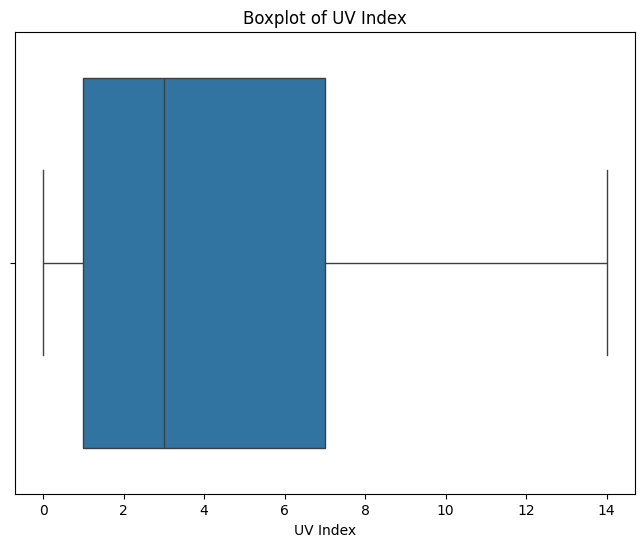

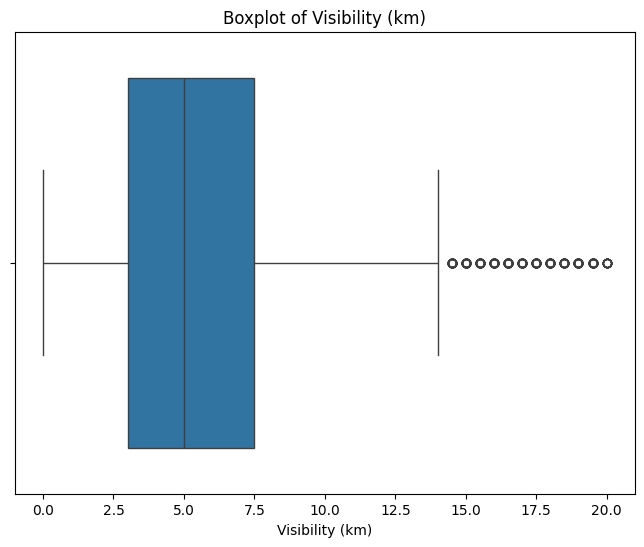

In [11]:
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

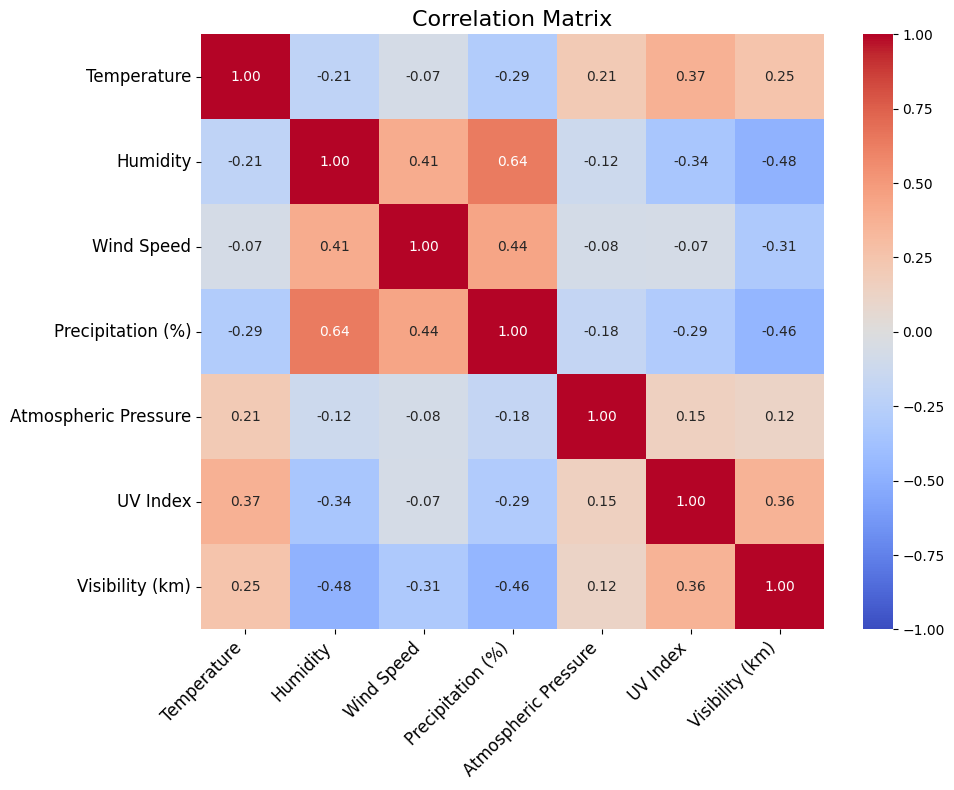

In [12]:
plt.figure(figsize=(10, 8))

correlation_matrix = df[numerical_features].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt='.2f',
            annot_kws={'size': 10})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
def count_and_handle_outliers(df, method='none'):
    df_out = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns
    total_outliers = 0

    print("Jumlah outlier per kolom:")
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_mask = (df[col] < lower) | (df[col] > upper)
        outlier_count = outlier_mask.sum()
        total_outliers += outlier_count

        print(f"- {col}: {outlier_count} outlier")

        if method == 'remove':
            df_out = df_out[~outlier_mask]
        elif method == 'cap':
            df_out[col] = df_out[col].clip(lower, upper)

    if total_outliers == 0:
        print("✅ Data sudah bersih dari outlier.")
    else:
        if method != 'none':
            print(f"✅ Total {total_outliers} outlier telah ditangani dengan metode '{method}'.")

    return df_out

In [14]:
df_cleaned = count_and_handle_outliers(df, method='cap')

Jumlah outlier per kolom:
- Temperature: 92 outlier
- Humidity: 0 outlier
- Wind Speed: 404 outlier
- Precipitation (%): 0 outlier
- Atmospheric Pressure: 927 outlier
- UV Index: 0 outlier
- Visibility (km): 383 outlier
✅ Total 1806 outlier telah ditangani dengan metode 'cap'.


In [15]:
X = df_cleaned.drop('Weather Type', axis=1)
y = df_cleaned['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
def scale_data(X_train, X_test):
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    scaler = MinMaxScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

    return X_train_scaled, X_test_scaled

In [17]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [18]:
def encode_labels(X_train, X_test):
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

    for col in cat_cols:
        encoder = LabelEncoder()
        X_train_encoded[col] = encoder.fit_transform(X_train[col])
        X_test_encoded[col] = encoder.transform(X_test[col])

    return X_train_encoded, X_test_encoded

In [19]:
X_train_encoded, X_test_encoded = encode_labels(X_train_scaled, X_test_scaled)

In [20]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [22]:
# Gabungkan X_train dan y_train
train_data = X_train_encoded.copy()
train_data['Weather Type'] = y_train_encoded
train_data.to_csv('train_data.csv', index=False)

# Gabungkan X_test dan y_test
test_data = X_test_encoded.copy()
test_data['Weather Type'] = y_test_encoded
test_data.to_csv('test_data.csv', index=False)